<a href="https://colab.research.google.com/github/NikolayIvTkachenko/Colab_Python_AI_NeuroNetwork/blob/main/NeuroNetwork_CNN_003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2025-10-21 21:00:29--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  70.6MB/s    in 2.3s    

2025-10-21 21:00:31 (70.6 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [4]:
cifar = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
!tar -xvzf cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [5]:

def unpickle(file):
  import pickle
  with open(file, 'rb') as fo:
    dict = pickle.load(fo, encoding='bytes')
    return dict

In [22]:
def load_data(file_location):
  x_train = None
  y_train = None

  #Education data
  for i in [1, 2, 3, 4, 5]:
    db_dict = unpickle(file_location + "data_batch_"+str(i))
    data_points = len(db_dict[b'data'])
    data = db_dict[b'data'].reshape((data_points, 3, 32, 32)).transpose((0, 2, 3, 1))
    if x_train is None:
      x_train = data
      y_train = db_dict[b'labels']
    else:
      x_train = np.concatenate((x_train, data))
      y_train = np.concatenate((y_train, db_dict[b'labels']))
  #Test data
  db_dict = unpickle(file_location+"test_batch")
  data_points = len(db_dict[b'data'])
  x_test = db_dict[b'data'].reshape((data_points, 3, 32, 32)).transpose((0, 2, 3, 1))
  y_test = np.array(db_dict[b'labels'])

  return (x_train, y_train), (x_test, y_test)


In [23]:
meta_dict = unpickle("./cifar-10-batches-py/batches.meta")
meta_dict[b'label_names']

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [24]:
(x_train, y_train), (x_test, y_test) = load_data("./cifar-10-batches-py/")
x_train, x_test = x_train / 255.0, x_test / 255.0

In [25]:
print(x_train.shape)
print(y_train.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000,)
(50000,)
(10000,)


Label value: 9 and label name: b'truck' 


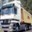

In [26]:
print("Label value: {0} and label name: {1} ".format(y_train[1], meta_dict[b'label_names'][y_train[1]]))
tf.keras.utils.array_to_img(x_train[1])

In [27]:
def create_model():
  inputs = tf.keras.layers.Input(shape=(32, 32, 3))
  x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same')(inputs)
  x = tf.keras.layers.Activation("relu")(x)
  x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

  x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same')(x)
  x = tf.keras.layers.Activation("relu")(x)
  x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

  x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
  x = tf.keras.layers.Activation("relu")(x)

  x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
  x = tf.keras.layers.Activation("relu")(x)
  x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

  x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same')(x)
  x = tf.keras.layers.Activation("relu")(x)
  x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same')(x)
  x = tf.keras.layers.Activation("relu")(x)
  x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

  x = tf.keras.layers.Flatten()(x)

  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dense(128, activation='relu')(x)

  predictions = tf.keras.layers.Dense(10, activation='softmax')(x)

  model = tf.keras.models.Model(inputs=inputs, outputs=predictions)

  return model

In [28]:
model = create_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [30]:
history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    steps_per_epoch=200,
    verbose=2,
    validation_steps=50,
    validation_split=0.2
    )

Epoch 1/50
200/200 - 23s - 114ms/step - loss: 2.0635 - sparse_categorical_accuracy: 0.2052 - val_loss: 1.9044 - val_sparse_categorical_accuracy: 0.2981
Epoch 2/50
200/200 - 20s - 99ms/step - loss: 1.8198 - sparse_categorical_accuracy: 0.3144 - val_loss: 1.7634 - val_sparse_categorical_accuracy: 0.3369
Epoch 3/50
200/200 - 18s - 88ms/step - loss: 1.6820 - sparse_categorical_accuracy: 0.3636 - val_loss: 1.6370 - val_sparse_categorical_accuracy: 0.3963
Epoch 4/50
200/200 - 20s - 99ms/step - loss: 1.5795 - sparse_categorical_accuracy: 0.4067 - val_loss: 1.5583 - val_sparse_categorical_accuracy: 0.4206
Epoch 5/50
200/200 - 41s - 205ms/step - loss: 1.5199 - sparse_categorical_accuracy: 0.4422 - val_loss: 1.4752 - val_sparse_categorical_accuracy: 0.4556
Epoch 6/50
200/200 - 17s - 87ms/step - loss: 1.4376 - sparse_categorical_accuracy: 0.4705 - val_loss: 1.3697 - val_sparse_categorical_accuracy: 0.4881
Epoch 7/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


200/200 - 5s - 25ms/step - loss: 1.4237 - sparse_categorical_accuracy: 0.4737 - val_loss: 1.4444 - val_sparse_categorical_accuracy: 0.4787
Epoch 8/50
200/200 - 18s - 88ms/step - loss: 1.3669 - sparse_categorical_accuracy: 0.5013 - val_loss: 1.3436 - val_sparse_categorical_accuracy: 0.4956
Epoch 9/50
200/200 - 17s - 87ms/step - loss: 1.3646 - sparse_categorical_accuracy: 0.5025 - val_loss: 1.3353 - val_sparse_categorical_accuracy: 0.5150
Epoch 10/50
200/200 - 18s - 89ms/step - loss: 1.2954 - sparse_categorical_accuracy: 0.5284 - val_loss: 1.2413 - val_sparse_categorical_accuracy: 0.5475
Epoch 11/50
200/200 - 19s - 94ms/step - loss: 1.2434 - sparse_categorical_accuracy: 0.5473 - val_loss: 1.2532 - val_sparse_categorical_accuracy: 0.5512
Epoch 12/50
200/200 - 18s - 89ms/step - loss: 1.2465 - sparse_categorical_accuracy: 0.5475 - val_loss: 1.2219 - val_sparse_categorical_accuracy: 0.5750
Epoch 13/50
200/200 - 18s - 89ms/step - loss: 1.1698 - sparse_categorical_accuracy: 0.5752 - val_loss: 

In [31]:
model.evaluate(x_train, y_train)
model.evaluate(x_test, y_test)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - loss: 0.5135 - sparse_categorical_accuracy: 0.8228
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.9043 - sparse_categorical_accuracy: 0.6966


[0.8998587131500244, 0.6987000107765198]

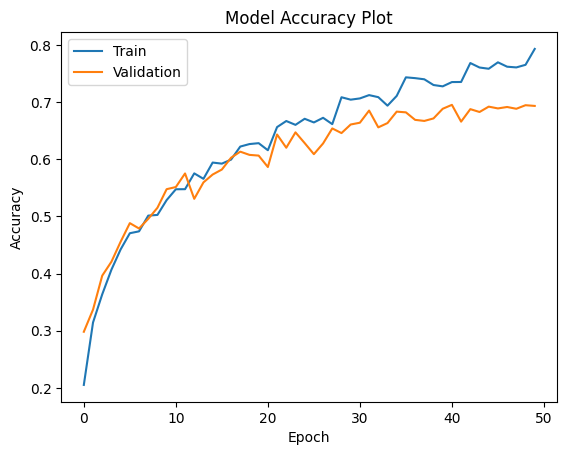

In [32]:
#График точности модели
plt.plot(history.history["sparse_categorical_accuracy"])
plt.plot(history.history["val_sparse_categorical_accuracy"])
plt.title("Model Accuracy Plot")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

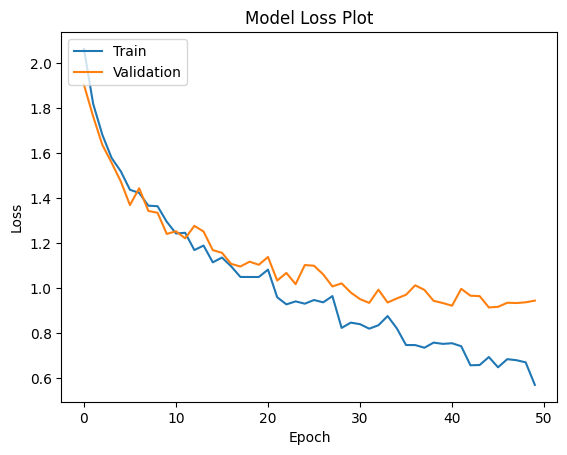

In [33]:
#График потерь модели

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc="upper left")

In [7]:
#Устранение переобучения дропаут
def create_model_v2():
  inputs = tf.keras.layers.Input(shape=(32, 32, 3))
  x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same')(inputs)

  x = tf.keras.layers.Activation("relu")(x)
  x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
  x = tf.keras.layers.Dropout(0.2)(x)

  x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same')(x)
  x = tf.keras.layers.Activation("relu")(x)
  x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
  x = tf.keras.layers.Dropout(0.2)(x)

  x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
  x = tf.keras.layers.Activation("relu")(x)
  x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
  x = tf.keras.layers.Activation("relu")(x)
  x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
  x = tf.keras.layers.Dropout(0.2)(x)

  x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same')(x)
  x = tf.keras.layers.Activation("relu")(x)
  x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same')(x)
  x = tf.keras.layers.Activation("relu")(x)
  x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
  x = tf.keras.layers.Dropout(0.2)(x)

  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.2)(x)

  predictions = tf.keras.layers.Dense(10, activation='softmax')(x)

  model = tf.keras.models.Model(inputs=inputs, outputs=predictions)

  return model



In [8]:
model_v2 = create_model_v2()
model_v2.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [12]:
history2 = model_v2.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    steps_per_epoch=200,
    verbose=2,
    validation_steps=50,
    validation_split=0.2,

)

Epoch 1/50
200/200 - 25s - 125ms/step - loss: 1.2833 - sparse_categorical_accuracy: 0.5406 - val_loss: 1.3160 - val_sparse_categorical_accuracy: 0.5506
Epoch 2/50
200/200 - 41s - 204ms/step - loss: 1.3027 - sparse_categorical_accuracy: 0.5352 - val_loss: 1.2323 - val_sparse_categorical_accuracy: 0.5725
Epoch 3/50
200/200 - 25s - 126ms/step - loss: 1.3203 - sparse_categorical_accuracy: 0.5403 - val_loss: 1.2038 - val_sparse_categorical_accuracy: 0.5656
Epoch 4/50
200/200 - 28s - 138ms/step - loss: 1.3156 - sparse_categorical_accuracy: 0.5453 - val_loss: 1.2629 - val_sparse_categorical_accuracy: 0.5487
Epoch 5/50
200/200 - 41s - 203ms/step - loss: 1.3106 - sparse_categorical_accuracy: 0.5420 - val_loss: 1.2304 - val_sparse_categorical_accuracy: 0.5675
Epoch 6/50
200/200 - 21s - 103ms/step - loss: 1.3404 - sparse_categorical_accuracy: 0.5302 - val_loss: 1.2354 - val_sparse_categorical_accuracy: 0.5688
Epoch 7/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


200/200 - 5s - 26ms/step - loss: 1.3441 - sparse_categorical_accuracy: 0.5075 - val_loss: 1.2731 - val_sparse_categorical_accuracy: 0.5569
Epoch 8/50
200/200 - 20s - 99ms/step - loss: 1.2790 - sparse_categorical_accuracy: 0.5444 - val_loss: 1.2386 - val_sparse_categorical_accuracy: 0.5600
Epoch 9/50
200/200 - 20s - 98ms/step - loss: 1.2789 - sparse_categorical_accuracy: 0.5536 - val_loss: 1.2124 - val_sparse_categorical_accuracy: 0.5763
Epoch 10/50
200/200 - 19s - 97ms/step - loss: 1.2708 - sparse_categorical_accuracy: 0.5478 - val_loss: 1.2584 - val_sparse_categorical_accuracy: 0.5806
Epoch 11/50
200/200 - 19s - 97ms/step - loss: 1.3027 - sparse_categorical_accuracy: 0.5436 - val_loss: 1.2436 - val_sparse_categorical_accuracy: 0.5919
Epoch 12/50
200/200 - 21s - 103ms/step - loss: 1.2830 - sparse_categorical_accuracy: 0.5594 - val_loss: 1.2089 - val_sparse_categorical_accuracy: 0.5650
Epoch 13/50
200/200 - 40s - 201ms/step - loss: 1.3029 - sparse_categorical_accuracy: 0.5383 - val_loss

In [13]:
model_v2.evaluate(x_train, y_train)
model_v2.evaluate(x_test, y_test)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - loss: 1.0800 - sparse_categorical_accuracy: 0.6253
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 1.1516 - sparse_categorical_accuracy: 0.5998


[1.1533195972442627, 0.5990999937057495]

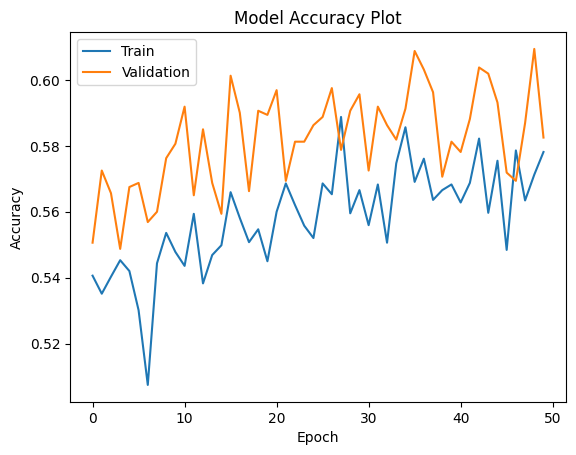

In [14]:
#График точности модели
plt.plot(history2.history["sparse_categorical_accuracy"])
plt.plot(history2.history["val_sparse_categorical_accuracy"])
plt.title("Model Accuracy Plot")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

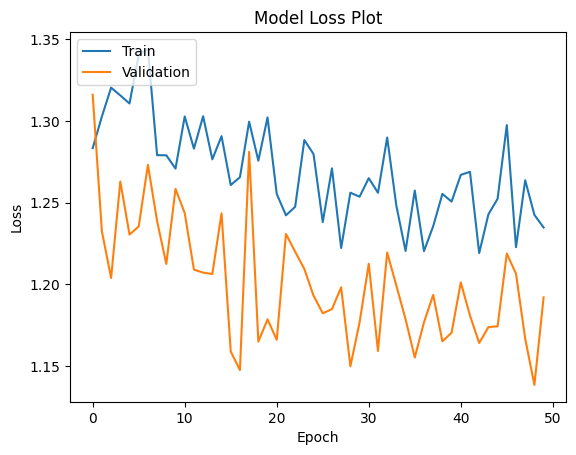

In [15]:
#График потерь модели

plt.plot(history2.history["loss"])
plt.plot(history2.history["val_loss"])
plt.title("Model Loss Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc="upper left")

In [18]:
#Регуляризация
def create_model_v3():
  inputs = tf.keras.layers.Input(shape=(32, 32, 3))
  x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same')(inputs)
  x = tf.keras.layers.Activation("relu")(x)
  x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

  x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same')(x)
  x = tf.keras.layers.Activation("relu")(x)
  x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

  x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
  x = tf.keras.layers.Activation("relu")(x)

  x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
  x = tf.keras.layers.Activation("relu")(x)
  x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

  x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same')(x)
  x = tf.keras.layers.Activation("relu")(x)
  x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same')(x)
  x = tf.keras.layers.Activation("relu")(x)
  x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

  x = tf.keras.layers.Flatten()(x)

  x = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.1))(x)
  x = tf.keras.layers.BatchNormalization()(x)

  x = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.1))(x)
  x = tf.keras.layers.BatchNormalization()(x)

  predictions = tf.keras.layers.Dense(10, activation='softmax')(x)

  model = tf.keras.models.Model(inputs=inputs, outputs=predictions)

  return model

In [19]:
model_v3 = create_model_v3()
model_v3.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [20]:
history3 = model_v2.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    steps_per_epoch=200,
    verbose=2,
    validation_steps=50,
    validation_split=0.2,

)

Epoch 1/50
200/200 - 24s - 120ms/step - loss: 1.2247 - sparse_categorical_accuracy: 0.5750 - val_loss: 1.1544 - val_sparse_categorical_accuracy: 0.6031
Epoch 2/50
200/200 - 24s - 121ms/step - loss: 1.2505 - sparse_categorical_accuracy: 0.5728 - val_loss: 1.3087 - val_sparse_categorical_accuracy: 0.5581
Epoch 3/50
200/200 - 24s - 118ms/step - loss: 1.2478 - sparse_categorical_accuracy: 0.5688 - val_loss: 1.2049 - val_sparse_categorical_accuracy: 0.5831
Epoch 4/50
200/200 - 19s - 95ms/step - loss: 1.2384 - sparse_categorical_accuracy: 0.5684 - val_loss: 1.1978 - val_sparse_categorical_accuracy: 0.5788
Epoch 5/50
200/200 - 20s - 102ms/step - loss: 1.2636 - sparse_categorical_accuracy: 0.5569 - val_loss: 1.1602 - val_sparse_categorical_accuracy: 0.5869
Epoch 6/50
200/200 - 19s - 96ms/step - loss: 1.2204 - sparse_categorical_accuracy: 0.5736 - val_loss: 1.1482 - val_sparse_categorical_accuracy: 0.5794
Epoch 7/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


200/200 - 7s - 36ms/step - loss: 1.2577 - sparse_categorical_accuracy: 0.5531 - val_loss: 1.1351 - val_sparse_categorical_accuracy: 0.6125
Epoch 8/50
200/200 - 19s - 94ms/step - loss: 1.2360 - sparse_categorical_accuracy: 0.5723 - val_loss: 1.1607 - val_sparse_categorical_accuracy: 0.5956
Epoch 9/50
200/200 - 20s - 101ms/step - loss: 1.1996 - sparse_categorical_accuracy: 0.5873 - val_loss: 1.1921 - val_sparse_categorical_accuracy: 0.5938
Epoch 10/50
200/200 - 20s - 102ms/step - loss: 1.2713 - sparse_categorical_accuracy: 0.5628 - val_loss: 1.1607 - val_sparse_categorical_accuracy: 0.6025
Epoch 11/50
200/200 - 21s - 107ms/step - loss: 1.2093 - sparse_categorical_accuracy: 0.5823 - val_loss: 1.1646 - val_sparse_categorical_accuracy: 0.5881
Epoch 12/50
200/200 - 19s - 95ms/step - loss: 1.2719 - sparse_categorical_accuracy: 0.5656 - val_loss: 1.1754 - val_sparse_categorical_accuracy: 0.5962
Epoch 13/50
200/200 - 20s - 101ms/step - loss: 1.2362 - sparse_categorical_accuracy: 0.5714 - val_lo

In [21]:
model_v3.evaluate(x_train, y_train)
model_v3.evaluate(x_test, y_test)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - loss: 43.4967 - sparse_categorical_accuracy: 0.0997
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 43.5843 - sparse_categorical_accuracy: 0.1005


[43.511383056640625, 0.10010000318288803]

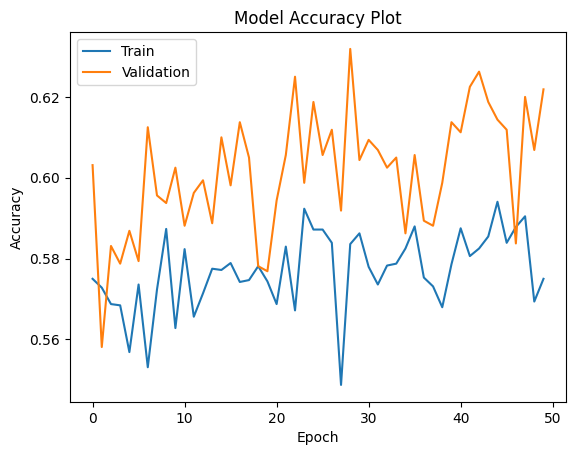

In [22]:
#График точности модели
plt.plot(history3.history["sparse_categorical_accuracy"])
plt.plot(history3.history["val_sparse_categorical_accuracy"])
plt.title("Model Accuracy Plot")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

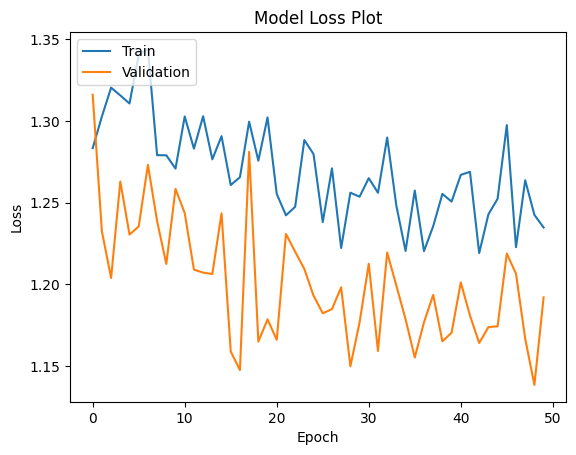

In [23]:
#График потерь модели

plt.plot(history2.history["loss"])
plt.plot(history2.history["val_loss"])
plt.title("Model Loss Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc="upper left")

In [24]:
def create_model_vgg16():
  inputs = tf.keras.layers.Input(shape=(32, 32, 3))
  resize = tf.keras.layers.UpSampling2D(size=(7, 7))(inputs)

  base_model_output = tf.keras.applications.vgg16.VGG16(
      include_top = False,
      input_shape = (224, 224, 3),
      weights = 'imagenet'
  )(resize)

  x = tf.keras.layers.GlobalAveragePooling2D()(base_model_output)
  x = tf.keras.layers.Dense(1024, activation="relu")(x)
  x = tf.keras.layers.Dense(512, activation="relu")(x)
  pred = tf.keras.layers.Dense(10, activation='softmax')(x)

  model = tf.keras.models.Model(inputs=inputs, outputs=pred)

  return model

In [ ]:
model_vgg16 = create_model_vgg16()
model_vgg16.summary()

In [ ]:
model_vgg16.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [ ]:
history_vgg16 = model_vgg16.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    verbose=2,
    validation_split=0.2
)

In [ ]:
model_vgg16.evaluate(x_train, y_train)
model_vgg16.evaluate(x_test, y_test)

In [ ]:
def create_model_resnet50():
  inputs = tf.keras.layers.Input(shape=(32, 32, 3))
  resize = tf.keras.layers.UpSampling2D(size=(7, 7))(inputs)

  base_model_output = tf.keras.applications.resnet50.ResNet50(
      include_top = False,
      input_shape = (224, 224, 3),
      weights = 'imagenet'
  )(resize)

  x = tf.keras.layers.GlobalAveragePooling2D()(base_model_output)
  x = tf.keras.layers.Dense(1024, activation="relu")(x)
  x = tf.keras.layers.Dense(512, activation="relu")(x)

  predictions = tf.keras.layers.Dense(10, activation='softmax')(x)

  model = tf.keras.models.Model(inputs=inputs, outputs=predictions)

  return model

In [ ]:
model_resnet50 = create_model_resnet50()
model_resnet50.summary()

In [ ]:
model_resnet50.evaluate(x_train, y_train)
model_resnet50.evaluate(x_test, y_test)

In [ ]:
from PIL import Image
im = Image.open("./test.jpg")
im = np.array(im)
im = im/255.0
print(im.shape)
plt.show(im)